### Data Science with Cryptocurrencies
---

Analysis of past returns and building a prediction model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as reader
import seaborn as sns

%matplotlib inline

### Get online cryptocurrency prices
---
Exclude Stablecoins and Forks

In [2]:
end_date = dt.datetime.now()
# Go four years back from today
start_date = dt.date(end_date.year - 4, end_date.month, end_date.day)

In [3]:
crypto_list = ['BTC-USD','ETH-USD','XRP-USD','LTC-USD']

In [4]:
df  = reader.get_data_yahoo(crypto_list, start_date, end_date)['Adj Close']
df

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-05-04,9700.759766,785.624023,0.895442,168.787994
2018-05-05,9858.150391,816.119995,0.905103,177.761993
2018-05-06,9654.799805,792.310974,0.871424,171.800003
2018-05-07,9373.009766,753.724976,0.832641,164.878998
2018-05-08,9234.820312,752.856995,0.813970,159.617004
...,...,...,...,...
2022-05-01,38469.093750,2827.756104,0.607844,99.435776
2022-05-02,38529.328125,2857.410400,0.614269,100.693230
2022-05-03,37750.453125,2783.476318,0.604849,99.343018


### Add some plotting
---

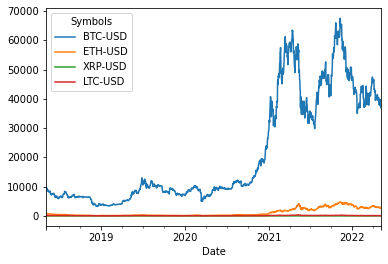

In [5]:
# These plots are misleading since they don't count for scale or relative price changes
df.plot()
plt.show()

### To compare cryptos, we have to work with returns and not absolute prices
---

In [6]:
daily_returns = df.pct_change().dropna(axis=0)
daily_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-05-05,0.016225,0.038818,0.010789,0.053167
2018-05-06,-0.020628,-0.029173,-0.037210,-0.033539
2018-05-07,-0.029187,-0.048701,-0.044505,-0.040285
2018-05-08,-0.014743,-0.001152,-0.022424,-0.031914
2018-05-09,0.009785,-0.000773,-0.014653,-0.016051
...,...,...,...,...
2022-05-01,0.019998,0.035737,0.035349,0.034002
2022-05-02,0.001566,0.010487,0.010570,0.012646
2022-05-03,-0.020215,-0.025875,-0.015335,-0.013409


### Calculate cumulative returns to make cryptos comparable
---

In [7]:
daily_cum_returns = (daily_returns + 1).cumprod() -1
daily_cum_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-05-05,0.016225,0.038818,0.010789,0.053167
2018-05-06,-0.004738,0.008512,-0.026822,0.017845
2018-05-07,-0.033786,-0.040603,-0.070134,-0.023159
2018-05-08,-0.048031,-0.041708,-0.090985,-0.054334
2018-05-09,-0.038717,-0.042449,-0.104305,-0.069513
...,...,...,...,...
2022-05-01,2.965575,2.599376,-0.321180,-0.410884
2022-05-02,2.971785,2.637122,-0.314005,-0.403434
2022-05-03,2.891494,2.543013,-0.324525,-0.411433


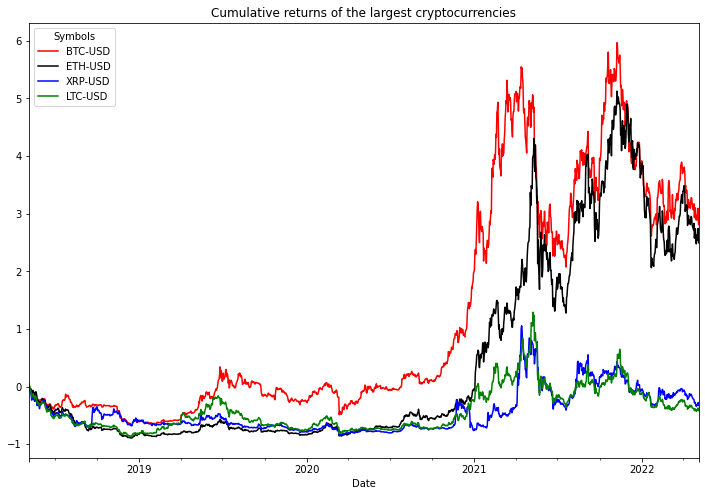

In [8]:
colors = ['r','k','b','g']
daily_cum_returns.plot(color=colors,figsize=(12,8))
plt.title("Cumulative returns of the largest cryptocurrencies")
plt.show()


### Cryptocurrency price charts over the past 4 years
---

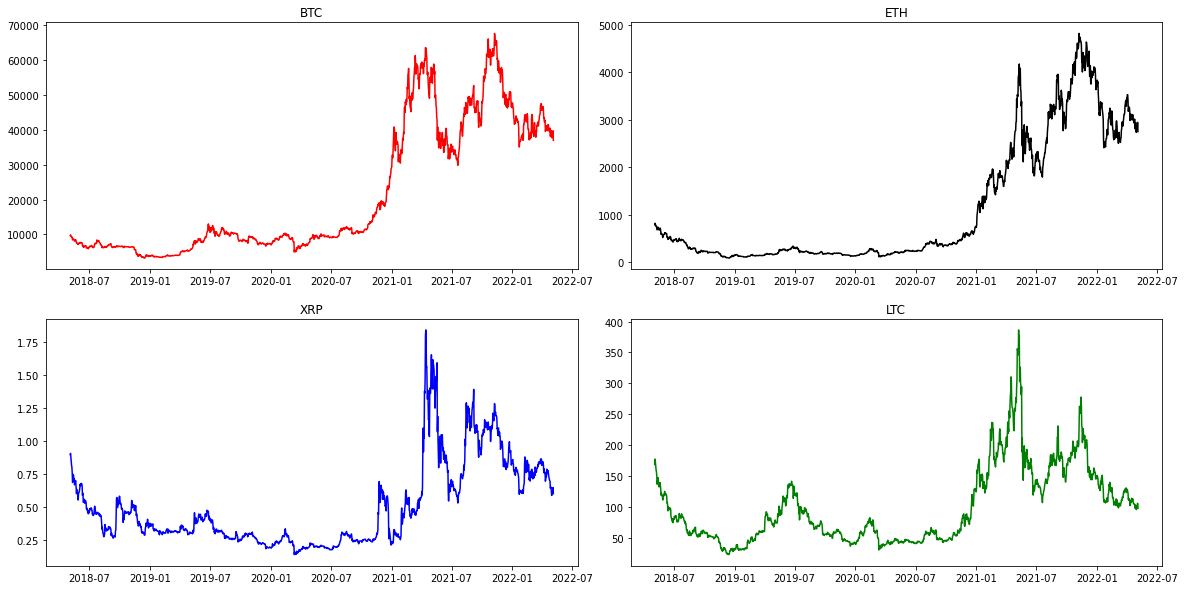

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.1})

axs[0,0].plot(df["BTC-USD"], c='r')
axs[0,0].set_title("BTC")
axs[0,1].plot(df["ETH-USD"], c='k')
axs[0,1].set_title("ETH")
axs[1,0].plot(df["XRP-USD"], c='b')
axs[1,0].set_title("XRP")
axs[1,1].plot(df["LTC-USD"], c='g')
axs[1,1].set_title("LTC")
plt.show()

### Comparison of Daily Volatilies
---

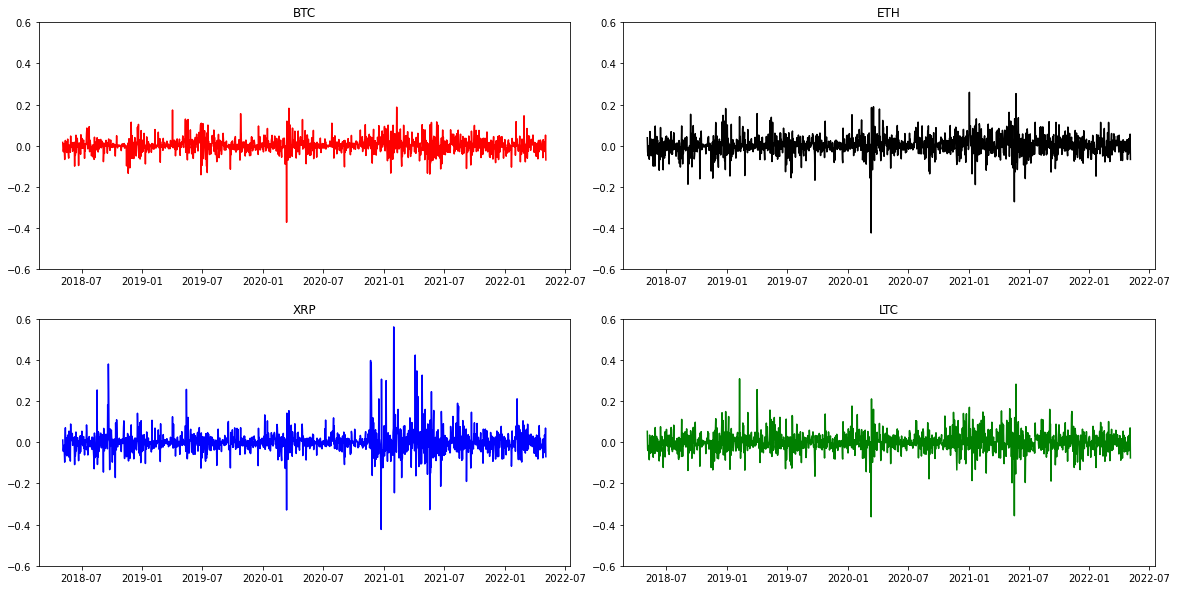

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.1})

axs[0,0].plot(daily_returns["BTC-USD"], c='r')
axs[0,0].set_title("BTC")
axs[0,0].set_ylim([-0.6, 0.6])
axs[0,1].plot(daily_returns["ETH-USD"], c='k')
axs[0,1].set_title("ETH")
axs[0,1].set_ylim([-0.6, 0.6])
axs[1,0].plot(daily_returns["XRP-USD"], c='b')
axs[1,0].set_title("XRP")
axs[1,0].set_ylim([-0.6, 0.6])
axs[1,1].plot(daily_returns["LTC-USD"], c='g')
axs[1,1].set_title("LTC")
axs[1,1].set_ylim([-0.6, 0.6])
plt.show()

### How are returns distributed?
---

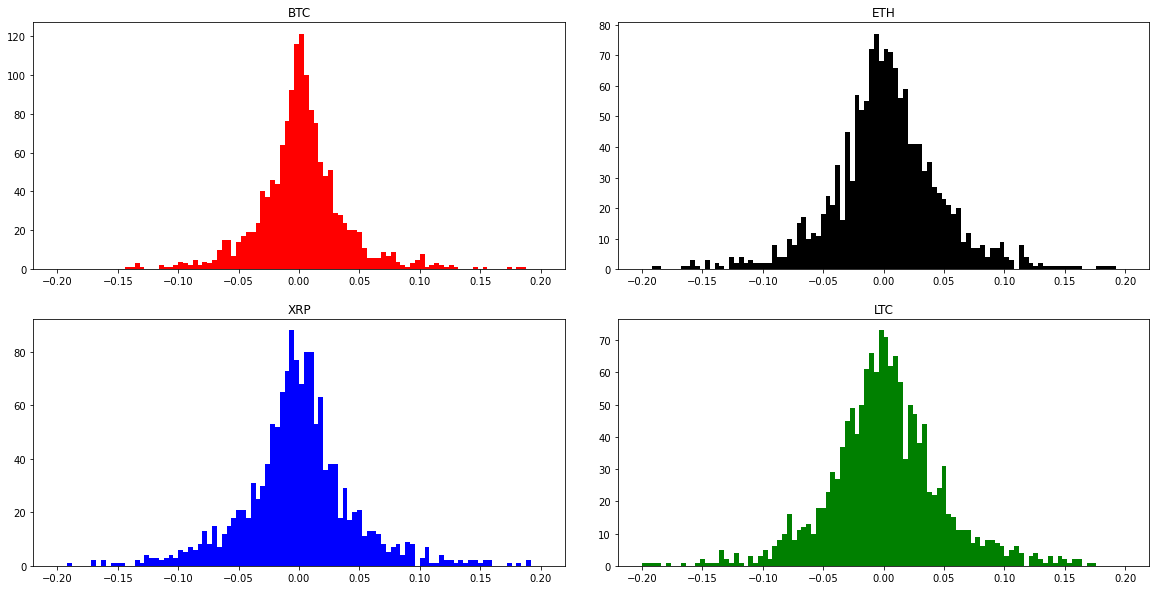

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.1})

axs[0,0].hist(daily_returns["BTC-USD"], bins=100, color='r', range=(-0.2, 0.2))
axs[0,0].set_title("BTC")
axs[0,1].hist(daily_returns["ETH-USD"], bins=100, color='k', range=(-0.2, 0.2))
axs[0,1].set_title("ETH")
axs[1,0].hist(daily_returns["XRP-USD"], bins=100, color='b', range=(-0.2, 0.2))
axs[1,0].set_title("XRP")
axs[1,1].hist(daily_returns["LTC-USD"], bins=100, color='g', range=(-0.2, 0.2))
axs[1,1].set_title("LTC")
plt.show()

### View Extreme returns (Outliers)
---

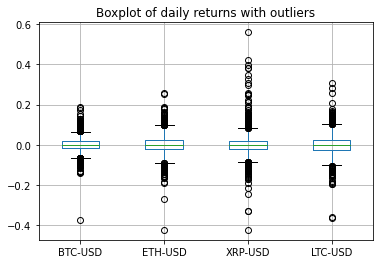

In [12]:
daily_returns.boxplot()
plt.title("Boxplot of daily returns with outliers")
plt.show()

### View returns without outliers
---

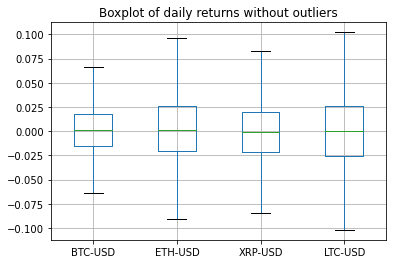

In [13]:
daily_returns.boxplot(showfliers=False)
plt.title("Boxplot of daily returns without outliers")
plt.show()

### Correlations of Cryptocurrency Returns
---

In [14]:
daily_returns.corr()

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Symbols,,,,
BTC-USD,1.000000,0.812056,0.579501,0.798650
ETH-USD,0.812056,1.000000,0.645738,0.830608
XRP-USD,0.579501,0.645738,1.000000,0.655756
LTC-USD,0.798650,0.830608,0.655756,1.000000


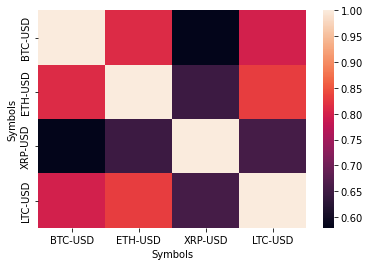

In [15]:
sns.heatmap(daily_returns.corr())
plt.show()

### Let us backtest a forecasting module with Bitcoin
---
Travel back in time and see how a prediction would have performed

In [39]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [18]:
# 1 year back
end1 = dt.date(end_date.year - 1, end_date.month, end_date.day)
print("One Year Ago: ", end1)
# 6 months back
end2 = dt.date(end_date.year-1, end_date.month + 6, end_date.day)
print("Six Months Ago: ", end2)
# Three years ago
start1 = dt.date(end1.year - 3, end_date.month, end_date.day)

One Year Ago:  2021-05-05
Six Months Ago:  2021-11-05


In [27]:
df1 = reader.get_data_yahoo(crypto_list, start1, end1)['Adj Close']
df2 = reader.get_data_yahoo(crypto_list, start1, end2)['Adj Close']

In [28]:
df1.head()

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-05-04,9700.759766,785.624023,0.895442,168.787994
2018-05-05,9858.150391,816.119995,0.905103,177.761993
2018-05-06,9654.799805,792.310974,0.871424,171.800003
2018-05-07,9373.009766,753.724976,0.832641,164.878998
2018-05-08,9234.820312,752.856995,0.813970,159.617004


In [29]:
df1 = df1.reset_index()
df1

Symbols,Date,BTC-USD,ETH-USD,XRP-USD,LTC-USD
0,2018-05-04,9700.759766,785.624023,0.895442,168.787994
1,2018-05-05,9858.150391,816.119995,0.905103,177.761993
2,2018-05-06,9654.799805,792.310974,0.871424,171.800003
3,2018-05-07,9373.009766,753.724976,0.832641,164.878998
4,2018-05-08,9234.820312,752.856995,0.813970,159.617004
...,...,...,...,...,...
1093,2021-05-01,57828.050781,2945.892822,1.651025,276.833527
1094,2021-05-02,56631.078125,2952.056152,1.562641,269.104370
1095,2021-05-03,57200.292969,3431.086182,1.555995,294.704010
1096,2021-05-04,53333.539062,3253.629395,1.392376,306.234497


In [30]:
df1[['ds', 'y']] = df1[['Date', 'BTC-USD']]
df1

Symbols,Date,BTC-USD,ETH-USD,XRP-USD,LTC-USD,ds,y
0,2018-05-04,9700.759766,785.624023,0.895442,168.787994,2018-05-04,9700.759766
1,2018-05-05,9858.150391,816.119995,0.905103,177.761993,2018-05-05,9858.150391
2,2018-05-06,9654.799805,792.310974,0.871424,171.800003,2018-05-06,9654.799805
3,2018-05-07,9373.009766,753.724976,0.832641,164.878998,2018-05-07,9373.009766
4,2018-05-08,9234.820312,752.856995,0.813970,159.617004,2018-05-08,9234.820312
...,...,...,...,...,...,...,...
1093,2021-05-01,57828.050781,2945.892822,1.651025,276.833527,2021-05-01,57828.050781
1094,2021-05-02,56631.078125,2952.056152,1.562641,269.104370,2021-05-02,56631.078125
1095,2021-05-03,57200.292969,3431.086182,1.555995,294.704010,2021-05-03,57200.292969
1096,2021-05-04,53333.539062,3253.629395,1.392376,306.234497,2021-05-04,53333.539062


In [40]:
modelfb1 = Prophet()

In [41]:
modelfb1.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -76.1035


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3003.97    0.00751546       373.677           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3067.84     0.0118217       338.025        1.92       0.192      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       3083.22   0.000101996       190.754   3.884e-07       0.001      333  LS failed, Hessian reset 
     299       3094.64     0.0378104       1199.74          10           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3112.38     0.0283546       1151.86           1           1      527   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3134.31   0.000877428       230.698      0.7114      0.7114      

In [42]:
modelfb2 = Prophet()
df2 = df2.reset_index()
df2[['ds','y']] = df2[['Date','BTC-USD']]
modelfb2.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -65.3367


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2590.06     0.0181159       336.105           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2641.33     0.0222551       252.313           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       2651.87   0.000288542       144.892   2.348e-06       0.001      331  LS failed, Hessian reset 
     299       2658.35    0.00419762       139.965      0.3741           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       2659.79    0.00039519       176.835   3.052e-06       0.001      452  LS failed, Hessian reset 
     399       2670.22    0.00238978        103.57      0.3001      0.7456      551   
    Iter      log prob        ||dx||      ||grad||       alpha

In [48]:
future1 = modelfb1.make_future_dataframe(periods=365)
future2 = modelfb2.make_future_dataframe(periods=180)

In [49]:
forecast1 = modelfb1.predict(future1)
forecast2 = modelfb2.predict(future2)

#### The 1 year prediction of BTC Price
---

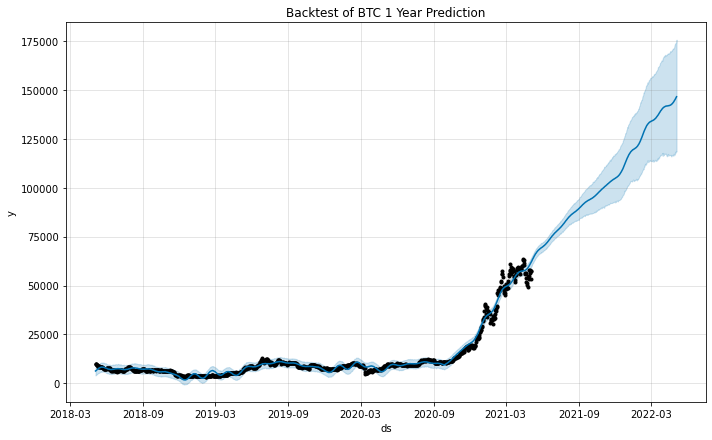

In [50]:
modelfb1.plot(forecast1)
plt.title("Backtest of BTC 1 Year Prediction")
plt.show()

#### The 6 month prediction of BTC Price
---

Backtest Looks more reasonable

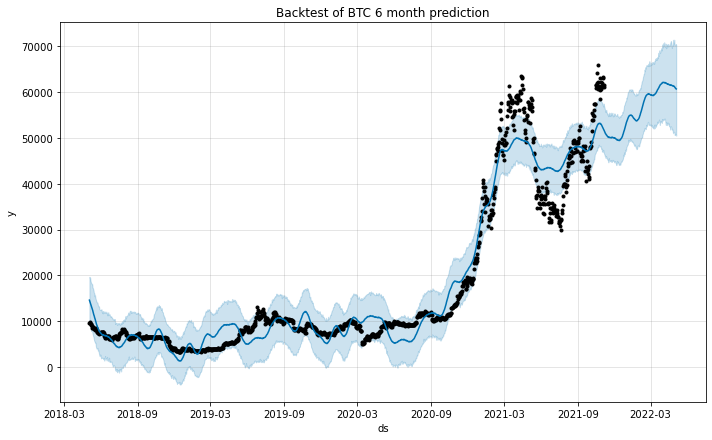

In [51]:
modelfb2.plot(forecast2)
plt.title("Backtest of BTC 6 month prediction")
plt.show()

### Where will Bitcoin be six months from now?
---

In [52]:
modelfb3 = Prophet()
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'BTC-USD']]
modelfb3.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -29.3163


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2771.06    0.00841909       138.443           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2877.12     0.0194124       247.034      0.8648      0.8648      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2908.05   0.000853312       187.876      0.4987      0.4987      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       2913.34   0.000255097       110.983   4.199e-06       0.001      529  LS failed, Hessian reset 
     399       2913.41   0.000325119       78.1348       0.278           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2919.52   0.000507947       178.312           1           1      

In [53]:
future3 = modelfb3.make_future_dataframe(periods=180)

In [54]:
forecast3 = modelfb3.predict(future3)

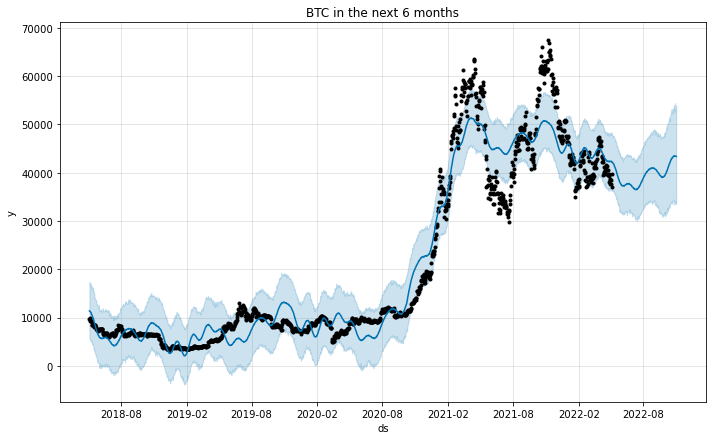

In [55]:
modelfb3.plot(forecast3)
plt.title("BTC in the next 6 months")
plt.show()

#### Do Cryptocurrency returns explain each other?
---

In [56]:
import statsmodels.api as sm

In [58]:
y = daily_returns['BTC-USD']
X1 = daily_returns[['ETH-USD']]
X2 = daily_returns[['ETH-USD','XRP-USD']]
X3 = daily_returns[['ETH-USD','XRP-USD','LTC-USD']]

X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

In [59]:
model1 = sm.OLS(y, X1)
model2 = sm.OLS(y, X2)
model3 = sm.OLS(y, X3)

results1 = model1.fit()
results2 = model2.fit()
results3 = model3.fit()

In [60]:
results1.rsquared

0.6594341838804045

In [61]:
results2.rsquared

0.6646463646561598

In [62]:
results3.rsquared

0.7092394251246684